# 8. Dimensionality Reduction

A careful selection of the features
to be included in our models has a large effect in the
outcomes of many machine learning algorithms, and in some cases may even help in our understanding of the
results obtained. We we will discuss Principal Component
Analysis (PCA) and Singular Value Decomposition (SVD)
as ways reducing the number of features in our dataset by
generating combinations of the given attributes with the
purpose of projecting into a lower dimensional space while
maintaining as much information as possible.

## 8.1 Dimensionality Reduction

The process of dimensionality reduction
involves taking datasets represented in large matrices and
finding “narrower” ones that are close to the original matrix. These narrower matrices have a smaller number of columns
and of rows, and in a way are easier to manipulate than the
large matrix we started with. The process of finding the “narrower” matrix we are
interested in involves the decomposition our original large
matrix into simpler meaningful pieces. In many cases, the
process involves the calculation of the eigenvalues and eigenvectors of the original matrix, i.e. eigenvalue
decomposition. Eigenvectors can be seen as the “directions” along which a linear transformation stretches (or compresses), or flips
an object, whereas eigenvalues are effectively the factors
by which such changes occur. In that way, eigenvalues
characterise important properties of linear transformations,
for example whether a system of linear equations has a
unique solution, and they can also describe the properties of
a mathematical model. The learning objective of dimensionality reduction is the use
of data in the most meaningful basis possible achieved by choosing a subset of features and create new
ones out of them.

## 8.2 Principal Component Analysis

It makes use of an orthogonal transformation to take the original N
coordinates of our dataset into a new coordinate system
known as the principal components. The aim of the
technique is to use a reduced subspace, provided by the
principal components, that seeks to maintain most of the
variability of the data. In succession, each of the rest of the The principal components are
ranked in decreasing order of
contribution to the variance. principal components provide their contribution to the
variability of the dataset. Since the transformation is
orthogonal, each of the components is uncorrelated with
each other. The orthogonality constraint comes from the fact
that the principal components are the eigenvectors of the
covariance matrix. The dimensionality reduction comes into place when representing our data using only those principal
components that provide the highest contributions to the
variance of the dataset. The scree plot may provide an
indication of how many principal components to keep.
Ideally the scree plot shows a steep downward curve: The
number of components to keep are those in the steepest part
of the plot. This is sometimes known as the elbow test.

In [6]:
%pylab inline
from numpy import mean,size
A = imread('images/JRogel_Jackalope.png')
print(shape(A))

Populating the interactive namespace from numpy and matplotlib
(200, 200, 4)


In [5]:
A1 = mean(A,2)
full_pc = size(A1,axis=1)
print(full_pc)

200


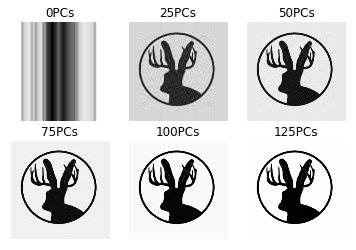

In [8]:
from sklearn import decomposition
components = range(0,150,25)
fig = plt.figure()
for i,num_pc in enumerate(components):
    i+=1

    pca = decomposition.PCA(n_components=num_pc)
    pca.fit(A1)
    Rec = pca.inverse_transform(pca.transform(A1))
    ax = fig.add_subplot(2,3,i,frame_on=False)
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    imshow(Rec)
    title(str(num_pc) + 'PCs')
    gray()

In [13]:
pca1 = decomposition.PCA()
pca1.fit(A1)
var_ratio = pca1.explained_variance_ratio_
var_ratio[1:10]

array([0.16860926, 0.10078612, 0.08265696, 0.05571319, 0.04347619,
       0.02986828, 0.02394756, 0.02177543, 0.01938365], dtype=float32)

In [14]:
# PCA in iris
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [15]:
import sklearn.model_selection as ms
XTrain,XTest,YTrain,YTest = ms.train_test_split(X,Y,test_size=0.3,random_state=7)

In [17]:
from sklearn import decomposition
IrisPCA = decomposition.PCA()
Iris_Decomp = IrisPCA.fit(XTrain)
X_Decomp = Iris_Decomp.transform(XTrain)
var_ratio = IrisPCA.explained_variance_ratio_
var_ratio

array([0.92400054, 0.05434169, 0.01653383, 0.00512395])

In [21]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline
logistic = linear_model.LogisticRegression()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca',pca),('logistic',logistic)])

In [22]:
from sklearn.model_selection import GridSearchCV
n_components = list(range(1,3))
Cs = np.logspace(-2,4,100)

In [29]:
from sklearn.model_selection import KFold
Iris_cls = GridSearchCV(pipe,dict(pca__n_components=n_components,logistic__C=Cs),cv=ms.KFold(n_splits=10))

In [30]:
Iris_cls.fit(XTrain,YTrain)
print(Iris_cls.best_params_)

{'logistic__C': 114.97569953977356, 'pca__n_components': 2}


In [31]:
y_pred = Iris_cls.predict(XTest)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(YTest,y_pred)

array([[12,  0,  0],
       [ 0, 13,  3],
       [ 0,  3, 14]])

## 8.3 Singular Value Decomposition

One such method is the Singular Value Decomposition or
SVD for short. It has the advantage of offering an exact
representation of any matrix and, most importantly for us,
enables the elimination of parts of the data that are deemed to be less important. It therefore creates an approximate
representation with the number of dimensions we choose.
In other words, it is a suitable alternative for dimensionality
reduction.

![alt text](images/svd_1.png "Title")

In [7]:
%pylab inline
import matplotlib.pyplot
import numpy as np
# Build the picture of letter J
M = np.zeros((250,150))
M[:31,:] = 1
M[:,60:91] = 1
M[-31:,:60] = 1
M[150:,:31] = 1

Populating the interactive namespace from numpy and matplotlib


In [8]:
M

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [9]:
M_noisy = np.asmatrix(np.random.uniform(low=0,high=0.7,size=(250,150)))
M_noisy = M + M_noisy
U,s,V = np.linalg.svd(M_noisy)

In [10]:
M_noisy

matrix([[1.40754669e+00, 1.26667873e+00, 1.13555328e+00, ...,
         1.45290646e+00, 1.07513930e+00, 1.48755624e+00],
        [1.05857043e+00, 1.23306366e+00, 1.35126582e+00, ...,
         1.28509874e+00, 1.28959642e+00, 1.35914907e+00],
        [1.14385223e+00, 1.24831556e+00, 1.60200934e+00, ...,
         1.67656696e+00, 1.12754896e+00, 1.19773338e+00],
        ...,
        [1.26831083e+00, 1.45143247e+00, 1.65686853e+00, ...,
         3.95726618e-01, 8.73074946e-04, 3.01060257e-01],
        [1.29330971e+00, 1.33490855e+00, 1.06329098e+00, ...,
         2.33136510e-01, 4.73211853e-01, 1.93009117e-01],
        [1.41660697e+00, 1.42357530e+00, 1.15497234e+00, ...,
         3.73670254e-01, 2.58953272e-01, 7.30151605e-02]])

In [12]:
for S in range(1,5):
    Sig = mat(np.eye(S)*s[:S])
    U_reduced = U[:,:S]
    V_reduced = V[:S,:]
    M_rec = U_reduced*Sig*V_reduced
    print(M_rec)

[[1.38215197 1.4015994  1.4139235  ... 0.76903842 0.74995016 0.77314261]
 [1.3740212  1.39335422 1.40560583 ... 0.76451441 0.74553844 0.76859445]
 [1.39470422 1.41432827 1.42676429 ... 0.77602258 0.75676096 0.78016404]
 ...
 [1.12914334 1.14503083 1.15509896 ... 0.62826276 0.61266868 0.63161566]
 [1.1327291  1.14866705 1.15876715 ... 0.6302579  0.6146143  0.63362145]
 [1.16725027 1.18367395 1.19408186 ... 0.64946571 0.63334535 0.65293176]]
[[1.62072712 1.62749287 1.64048978 ... 1.0992022  1.0627193  1.01451385]
 [1.6364975  1.64187836 1.65487017 ... 1.12775494 1.08964169 1.03414696]
 [1.65230107 1.65823232 1.6713948  ... 1.13251045 1.09446731 1.04077991]
 ...
 [1.19808224 1.21030523 1.22056777 ... 0.7236672  0.70304676 0.70136253]
 [1.21067094 1.22246582 1.23278572 ... 0.73812149 0.71679511 0.71247676]
 [1.23152781 1.24453476 1.25512394 ... 0.73841929 0.71761243 0.71796263]]
[[1.20931618 1.19849656 1.18058677 ... 1.36206522 1.30651812 1.26446055]
 [1.34702232 1.34002984 1.33127522 ... 

![alt text](images/svd_2.png "Title")

## 8.4 Recommendation Systems

Content-based filtering, where items are mapped into a
feature space using their attributes. The recommendations depend on the characteristics of the
items.Collaborative filtering considers data from the ratings
that other users have provided for specific items recommendations depend on the preferences expressed
by the user.

### 8.4.1 Content Based Filtering

Content-based filtering requires us to specify the
attributes or features that describe the items in our database.
We also need to obtain the scores that our users give to
each of these features. We can then represent users and items in terms of vectors in the feature space. The item
vectors provide a measure of the degree to which items are
described by each of the features in question. Similarly, user
vectors measure the preferences that the users have for each of the features. We can assume that users will prefer items
that are similar to the preferences they have expressed. a convenient way to define similarity is
provided by the cosine similarity. In this case, the ratings can be obtained by taking the dot product of the user and
item vectors and divide by the product of their norms.

In [60]:
import pandas as pd
import numpy as np

# Get data
films = pd.read_csv('Data/FilmCB.csv')
users = pd.read_csv('Data/UsersCB.csv')

# Recommend
def content_recomm(user,user_df,film_df):
    u = user_df.loc[user][1:].values
    u_norm = np.linalg.norm(u)
    film_recom = []
    for row in range(shape(film_df)[0]):
        f_name = film_df.index[row]
        f = film_df.ix[:,1:].iloc[row].values
        f_norm = np.linalg.norm(f)
        s = np.dot(u,f)/(u_norm*f_norm)
        if s>0.08:
            film_recom.append((f_name,s))
    film_recom = sorted(film_recom,key=lambda x: x[1],reverse=True)
    return film_recom

# ...debug...
#name = 'Eric'
#r1 = content_recomm(name,users,films)


    


In [59]:
users

,ID,user,Box Office,For Children,Oscar
0,a,Graham,4,2,5
1,b,Terry,1,2,2
2,c,Eric,5,4,4
3,d,John,4,3,1
4,e,Michael,3,2,5
5,f,Terry J.,1,1,4


In [61]:
films

,ID,Film,Box Office,For Children,Oscar
0,1,Cronos,2,1,1
1,2,Life of Brian,3,3,1
2,3,The Never-ending Story,2,5,1
3,4,Pinocchio,3,5,5
4,5,Titanic,5,2,5


### 8.4.2 Collaborative Filtering

The main assumption of collaborative filtering is that users get value from recommendations based on
other users with similar preferences and tastes. Collaborative filtering uses a
utility matrix to recommend items
based on other users’ preferences
and tastes. We could take a look at the ratings in our utility matrix to create a matrix detailing the
similarity among items. This approach is known as
item-based collaborative filtering or memory-based
collaborative filtering and the recommendations that a user receives are based on other items that the user has rated
highly in the past.  In item-based collaborative
filtering the user receives
recommendations based on
items she has rated in the past.

Another alternative is provided by the so-called model-
based collaborative filtering where instead of looking for similarity among items, we consider the utility matrix to be
the result of the product involving two thinner matrices U
and V, encapsulating latent concepts in our data. The utility
matrix is understood as the ratings that individual users
give to specific items available.

In [50]:
A = pd.read_csv('Data/CF_Table.csv',index_col=0,na_values=['?'])
A

,"I,Robot",The Martian,Electric,2001 Space,Solaris
User,,,,,
Alice,8.0,2.0,10.0,5.0,1.0
Bob,4.0,NaN,2.0,NaN,NaN
Carl,NaN,8.0,NaN,9.0,10.0
Daniel,5.0,NaN,4.0,NaN,10.0
Eve,7.0,2.0,9.0,6.0,NaN


In [51]:
A.fillna(A.mean(),inplace=True)
A

,"I,Robot",The Martian,Electric,2001 Space,Solaris
User,,,,,
Alice,8.0,2.0,10.00,5.000000,1.0
Bob,4.0,4.0,2.00,6.666667,7.0
Carl,6.0,8.0,6.25,9.000000,10.0
Daniel,5.0,4.0,4.00,6.666667,10.0
Eve,7.0,2.0,9.00,6.000000,7.0


In [52]:
# Recomm function
def cf_recomm(user,book,dat,S=2):
    uind = dat.index.get_loc(user)
    bind = dat.columns.get_loc(book)
    U,s,V = np.linalg.svd(dat)
    Reduced_Sig = np.mat(np.eye(S)*s[:S])
    U_reduced = U[:,:S]
    V_reduced = V[:S,:]
    recom = U_reduced[uind,:]*Reduced_Sig*np.mat(V_reduced[:,bind]).T
    return recom.item(0)

In [56]:
cf_recomm('Daniel','The Martian',A)

5.143220389720899

In [46]:
cf_recomm('Eve','Solaris',A)

5.542836428035578